In [8]:
import copy
import time
import h5py
import corner
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
file = h5py.File('samples_data_2.hdf5', 'r')
keep = np.array(file['keep'])
file.close()

In [4]:
m, b = keep[:,0], keep[:,1]
logl, logx, logw, logz = keep[:,2], keep[:,3], keep[:,4], keep[:,5]

logwt = logl + logw

weights = np.exp(logwt - logz[-1])


In [5]:
samples = np.zeros((len(m), 2))
samples[:,0], samples[:,1] = m, b
effective_size = int(len(weights)/(1+(weights/weights.mean() - 1)**2).mean())

print(samples.shape)
print(effective_size)

(20000, 2)
2003


In [6]:
eff_samps = np.zeros((effective_size, 2))
#np.random.seed(0)
for i in range(effective_size):

    eff_samps[i,0] = np.random.choice(m, p=weights)
    eff_samps[i,1] = np.random.choice(b, p=weights)

print(eff_samps.shape)

(2003, 2)


<Figure size 1440x864 with 0 Axes>

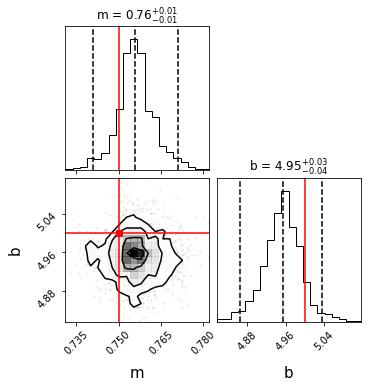

In [7]:
plt.figure(figsize=(20,12))

labels=['m', 'b']
truths=[0.75, 5]

figure = corner.corner(eff_samps, smooth=0.2, labels=labels, truth_color="r", quantiles=[0.025, 0.5, 0.975], truths=truths, label_kwargs=dict(fontsize='15'), show_titles=True, title_kwargs={"fontsize": 12}, hist_kwargs=dict(density=True))
figure.savefig('sampling_2.jpg', dpi=300)
plt.show()

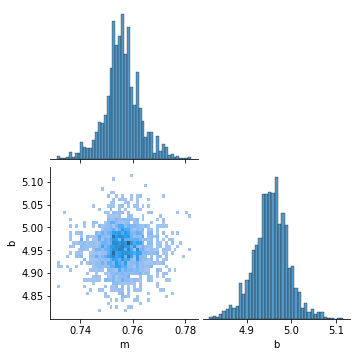

In [15]:
seaborn.pairplot(pd.DataFrame(eff_samps, columns = ['m', 'b']), corner = True, kind = 'hist')

<AxesSubplot:ylabel='Count'>

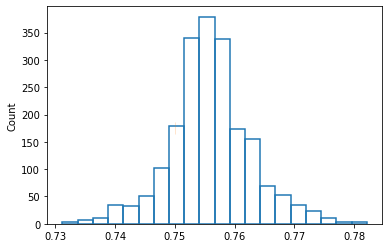

In [26]:
sns.histplot(pd.Series(eff_samps[:, 0]), bins = 20, fill = False)
sns.lineplot(x = 0.75, y=np.linspace(0, 350, 350))

In [16]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can be help

In [9]:
import numpy as np
a = []
b = np.zeros((2,3))
a.append(b)
a.append(b)
a

[array([[0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.]])]